# Определение популярного продукта для интернет-магазина компьютерных игр

### Описание проекта

На основании данных из открытых источников о продажах игр, оценок пользователей и экспертов, жанров и платформ требуется выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Для анализа представлен один файл с информацией.

### Содержание <a id="content"></a>
Шаг 1. [Изучение общей информации](#step_1)

Шаг 2. [Подготовка данных](#step_2)

Шаг 3. [Исследовательский анализ данных](#step_3)

Шаг 4. [Анализ данных и рейтинги](#step_4)

Шаг 5. [Проверка гипотез](#step_5)

Шаг 6. [Общий вывод](#step_6)

### Шаг 1. [Изучение общей информации](#content)<a id="step_1"></a>

In [1]:
#импорт библиотек и открытие файлов
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

data = pd.read_csv('/datasets/games.csv')

In [2]:
display(data.info(), data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод 
#### Для анализа имеется таблица состоящая из 16715 строк и 11 столбцов. Наименование столбцов следует привести к нижнему регистру. Типы данных некоторых объектов следует изменить:  `object` на `int` или `float` в зависимости от наличия дробной части. В некоторых столбцах имеются пропущенные значения, некоторые будут заменены медианами по группе, некоторые - маркерами для возможности произвести с ними группировки и анализ. Год релиза, несмотря на то, что это - дата, приводить к типу Datetime не будем, т.к. нет необходимости в рамка проекта проводить операции с датами, заменим на целочисленный тип, чтобы избавиться от запятой. 

#### Больше всего пропусков в данных об оценках критиков и пользователей а также рейтинге игры. Вероятно, отсутствуют данные о ранних играх, когда возможность дать оценку пользователем была ограниченаю, рейтинги ESRB стали давать играм после 1994 года. нзначительные пропуски в годах релиза могут быть вызваны техническии причинами. 

### Шаг 2. [Подготовка данных](#content)<a id="step_2"></a>

Приведем наименования столбцов к нижнему регистру и проверим таблицу на наличие дубликатов

In [3]:
data.columns = map(str.lower, data.columns)
data.duplicated().sum()

0

Изучим строки, с отсутствующими названиями игр

In [4]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих же строках отсутствуют сведения о жанре игр (1993 год) - эти строки можно удалить, можно оставить. Заменим на 'unknown' (тип данных в столбце - строковый).

In [5]:
data['name'] = data['name'].fillna('unknown')
data['genre'] = data['genre'].fillna('unknown')

In [6]:
print('Доля пропущенных данных о годе релиза игры: {:.2%}'.format(len(data[data['year_of_release'].isna() == True])/len(data)))

Доля пропущенных данных о годе релиза игры: 1.61%


Доля пропусков в данных о годах релиза - менее двух процентов, удалим строки, содержащие эти пропуски.

In [7]:
data['year_of_release'] = data['year_of_release'].dropna()

Пропущенные значения столбца `critic_score` заменим маркером -1 и заменим на целочисленный тип: дробных значений в этом столбце нет, в столбце `user_score` наоборот, значения дробные и имеется значение "tbd" ("to be discussed"), означающее, что сведений на момент составления данных не было, но они должны быть получены. Из-за наличия текстового значения столбец имеет тип данных `object`. Заменим tbd на "-10", NaN на "-1" и изменим тип данных на числовой (float).

In [8]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].astype(int)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data['user_score'] = data['user_score'].fillna(-1).replace('tbd', -10)
data['user_score'] = pd.to_numeric(data['user_score'])

Определим уникальные значения рейтинга игр

In [10]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [11]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Произведем заполнение отсутствующих значений на рейтинг 'RP' - «Рейтинг ожидается». А незначительному количеству игр с рейтингом 'K-A' ("Kids to Adults") присвоим рейтинг 'E'(«Everyone») (как это произошло исторически).

In [12]:
data['rating'] = data['rating'].fillna('RP').replace('K-A', 'E')

Суммарные продажи в регионах сохраним в новый столбец 

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [14]:
display(data.info(),data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.5+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,RP,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,RP,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,RP,28.31


### Вывод 
#### Предобработка выполнена, данные подготовлены для анализа.

### Шаг 3. [Исследовательский анализ данных](#content)<a id="step_3"></a>

##### Для того, чтобы оценить, сколько игр выпускалось в разные годы за 37 лет, построим гистограмму распределения

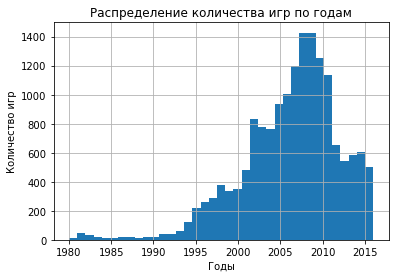

In [15]:
data['year_of_release'].hist(bins=37, grid = True)
plt.title('Распределение количества игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Годы');

На гистограмме видно, что развитие игр началось к 1995-му году с выходом на плато к 2000-му, потом взрывной рост до 2009-го года и резкий спад до значений около 600 в год. Наиболее информативным кажется период с 2000-го года.

##### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [16]:
data_platform = data.groupby(['platform']).agg({'total_sales':'sum'})
data_platform_max = data_platform.sort_values(by ='total_sales', ascending = False).head(6)

In [17]:
data_platform_max

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86


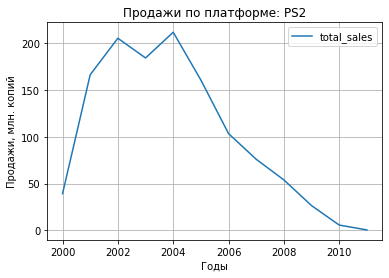

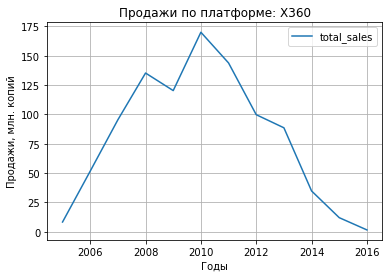

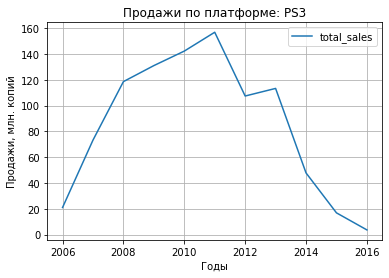

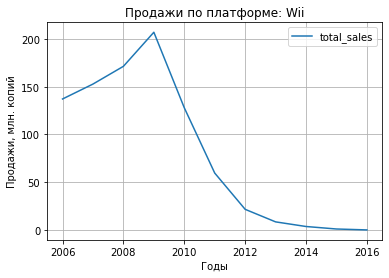

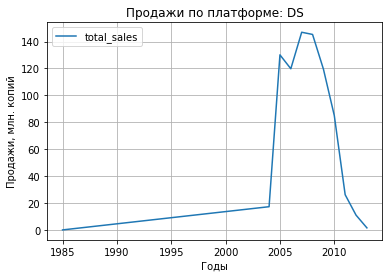

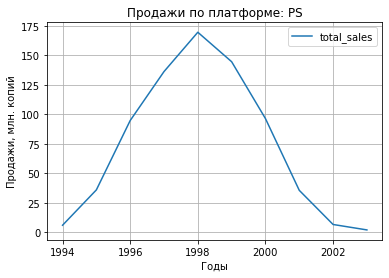

In [18]:
for i in data_platform_max.index:
    data.query('platform == @i').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(grid = True)
    
    plt.title('Продажи по платформе: {}'.format (i))
    plt.ylabel('Продажи, млн. копий')
    plt.xlabel('Годы')
    plt.show

В 2004-м году число проданных игр для PS2 превысило 200 миллионов. Аналогичный результат был достигнут в 2009-м году на платформе Wii. 
На графике DS наблюдается наличие выброса: платформа выпущена только в 2004 году, а имеются данные за 1985 год. Ошибка заключается либо в годе релиза, либо в указании платформы. Удалим этот артефакт.

In [19]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,-1,-1.0,RP,0.02


In [20]:
data = data.drop(data[data['name'] == 'Strongest Tokyo University Shogi DS'].index)

Некоторые из этих платформ уже утеряли былую популярность. В среднем продажи игр по платформе наблюдаются за период - 6 лет (кроме продаж на PC - персональный компьютер используется не всегда для работы).
Возьмем период с 2011 года график суммарных продаж вышел на "плато" и посмотрим информацию по платформам.

In [21]:
data_actually = data.loc[data['year_of_release'] > 2010]

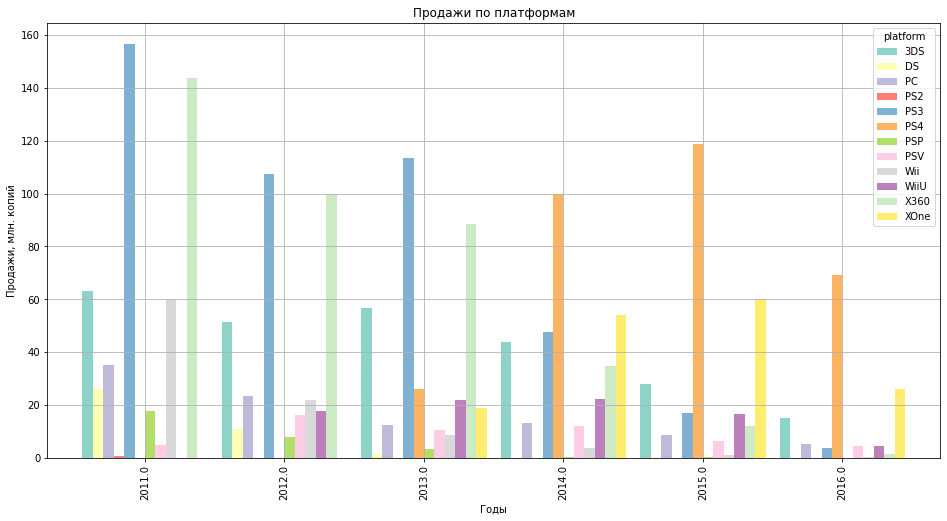

In [22]:
data_actually.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(kind = 'bar', grid = True, figsize = (16,8), width=0.9, colormap='Set3')
plt.title('Продажи по платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Годы')
plt.show;

### На графике видно, что продажи игр на игровых консолях Sony и Microsoft значительно превосходят остальные. Рост продаж игр для новых поколений приставок сопровождается снижением продаж для старых. 

Посмотрим продажи шести наиболее популярных с 2013-го года платформ за весь период их наличия на рынке. Сформируем список самых продаваемых платформ:

In [23]:
data_platform_current = data.query('year_of_release > 2012').groupby(['platform']).agg({'total_sales':'sum'})
data_platform_current_top6 = data_platform_current.sort_values(by ='total_sales', ascending = False).head(6)
data_platform_current_top6

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63


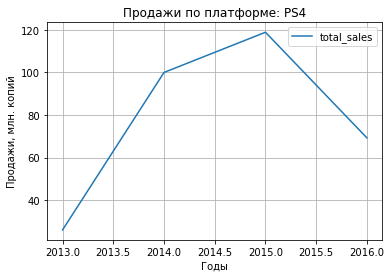

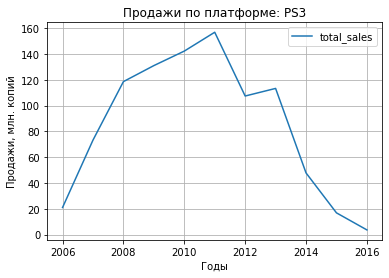

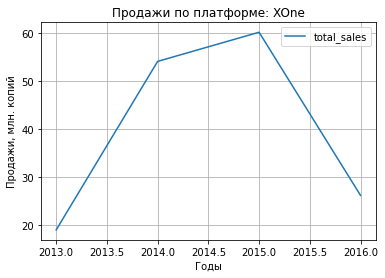

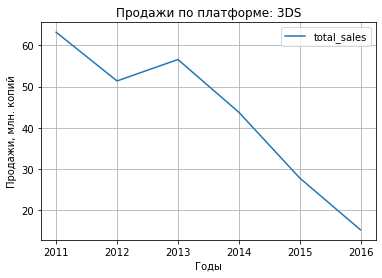

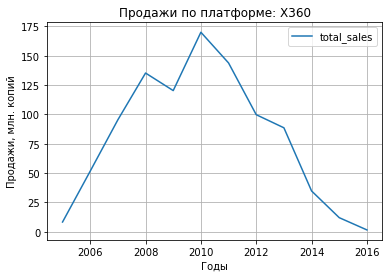

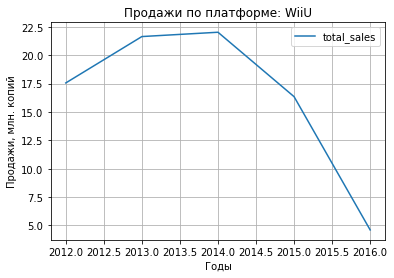

In [24]:
for i in data_platform_current_top6.index:
    data.query('platform == @i').pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(grid = True)
    
    plt.title('Продажи по платформе: {}'.format (i))
    plt.ylabel('Продажи, млн. копий')
    plt.xlabel('Годы')
    plt.show

Наиболее популярной является платформа PS4, которая не так давно появилась на рынке и не исчерпала свой потенциал.

Для определения актуальных платформ будем основываться на данных, с 2011 года включительно (можно взять период с 2013 года: даты выхода PS4 и XOne, но т.к. для анализа будут рассматриваться другие платформы - немного расширим период).  
##### Построим диаграммы размаха для платформ с 2011 года.

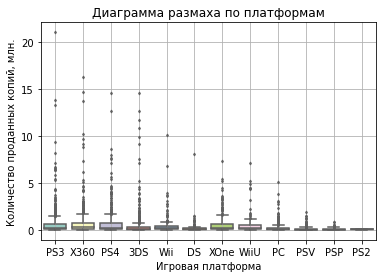

In [25]:
sns.boxplot(x="platform", y="total_sales", data= data_actually, palette="Set3", fliersize = 2)
plt.title('Диаграмма размаха по платформам')
plt.xlabel('Игровая платформа')
plt.grid()
plt.ylabel('Количество проданных копий, млн.');

На диаграмме размаха наблюдается большой разброс значенй (статистические выбросы) - игры, продажи которых значительно превышают средние продажи по платформе.
Основные компании, присутствующие на рынке: "Sony", "Nintendo", "Microsoft". Рассмотрим разброс значенй на актуальных приставках: "WiiU", "PS4", "XOne". А также на портативных консолях: "PSV" и "3DS".

In [26]:
data_trio = data_actually[(data_actually['platform'] == 'PS4')  | (data_actually['platform'] == 'WiiU') | (data_actually['platform'] == 'XOne')]
data_portable = data_actually[(data_actually['platform'] == 'PSV')  | (data_actually['platform'] == '3DS')]

Построим дииаграммы размаха по глобальным продажам игр на актуальных платформах.

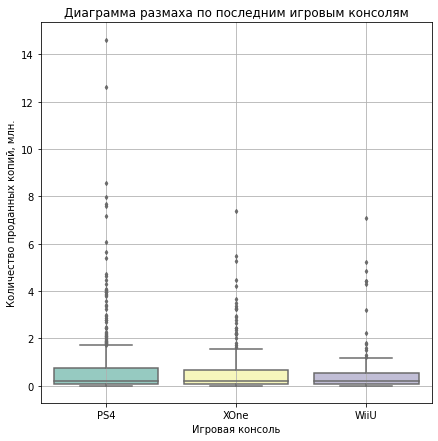

In [27]:
plt.figure(figsize=(7, 7))
sns.boxplot(x="platform", y="total_sales", data= data_trio, palette="Set3", fliersize = 3)
plt.title('Диаграмма размаха по последним игровым консолям')
plt.xlabel('Игровая консоль')
plt.grid()
plt.ylabel('Количество проданных копий, млн.');

Изменим границы отображения графика для большей наглядности.

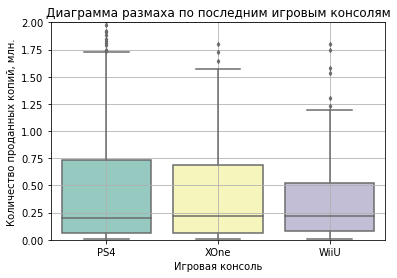

In [28]:
sns.boxplot(x="platform", y="total_sales", data= data_trio, palette="Set3", fliersize = 3)
plt.title('Диаграмма размаха по последним игровым консолям')
plt.xlabel('Игровая консоль')
plt.ylabel('Количество проданных копий, млн.')
plt.grid()
plt.ylim(0, 2);

Для трех разных платформ медианное значение продаж составляет около 200 тысяч копий одной игры. Различается только количество и размах: продажи игр на консолях Nintendo ниже других популярных платформ.
Аналогично построим диаграммы размаха для портативных консолей.

Text(0, 0.5, 'Количество проданных копий, млн.')

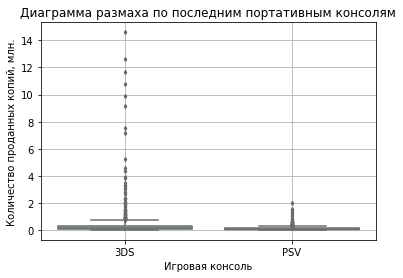

In [29]:
sns.boxplot(x="platform", y="total_sales", data= data_portable, palette="Set3", fliersize = 3)
plt.title('Диаграмма размаха по последним портативным консолям')
plt.xlabel('Игровая консоль')
plt.grid()
plt.ylabel('Количество проданных копий, млн.')

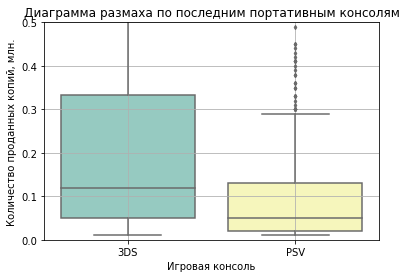

In [30]:
sns.boxplot(x="platform", y="total_sales", data= data_portable, palette="Set3", fliersize = 3)
plt.title('Диаграмма размаха по последним портативным консолям')
plt.xlabel('Игровая консоль')
plt.ylabel('Количество проданных копий, млн.')
plt.grid()
plt.ylim(0, 0.5);

Количество игр, проданных для консоли 3DS, больше, среднее количество проданных копий одной игры для консоли 3DS в два раза больше, чем для PSV. При этом, обе игровые консоли были выпущены в 2011 году, но новая консоль Sony не получила такой популярности, как предыдущая. Медианное значение проданных копий на платформе 3DS меньше, чем для игр на приставках, рассмотренных выше. 

#### Оценим влияние отзывов на продажи. Построим диаграмму распределения и посчитаем коэффициент корреляции Пирсона.

* для самой популярной платформы определим раздельно влияние оценок критиков и пользователей

In [31]:
data_with_critic_score = data[data['critic_score'] >= 0]
data_with_user_score = data[data['user_score'] >= 0]

In [32]:
data_ps4_cs = data_with_critic_score.query('platform == "PS4"')
data_ps4_us = data_with_user_score.query('platform == "PS4"')

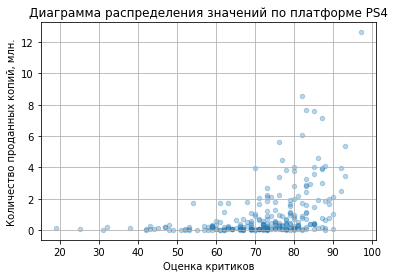

In [33]:
data_ps4_cs.plot(x ='critic_score', y = 'total_sales', kind = 'scatter', grid = 'True', alpha = 0.3)
plt.title('Диаграмма распределения значений по платформе PS4')
plt.xlabel('Оценка критиков')
plt.ylabel('Количество проданных копий, млн.');

In [34]:
print('Коэффициент корреляции медлу оценкой критиков и количеством копий ps4:',\
      round(data_ps4_cs['critic_score'].corr(data_ps4_cs['total_sales']),2))

Коэффициент корреляции медлу оценкой критиков и количеством копий ps4: 0.41


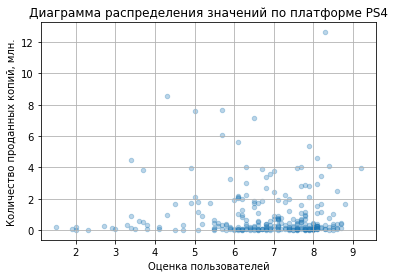

In [35]:
data_ps4_us.plot(x ='user_score', y = 'total_sales', kind = 'scatter', grid = 'True', alpha = 0.3)
plt.title('Диаграмма распределения значений по платформе PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Количество проданных копий, млн.');

In [36]:
print('Коэффициент корреляции медлу оценкой gjkmpjdfntktq и количеством копий ps4:',\
      round(data_ps4_us['user_score'].corr(data_ps4_us['total_sales']),2))

Коэффициент корреляции медлу оценкой gjkmpjdfntktq и количеством копий ps4: -0.03


Корреляция между оценкам критиков и кпродажами составляет 0,4 - показывает возможную прямую связь, а корреляция между оценками пользователей и продажами - близка к нулю, при этом с отрицательным знаком. Связи между оценками игроков и количеством проданных экземпляров нет.

* Рассмотрим коэффициенты корреляции для других платформ

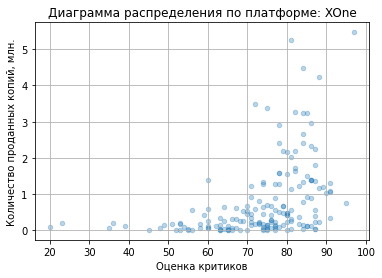

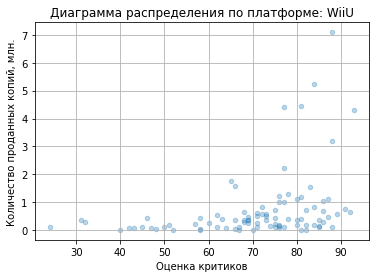

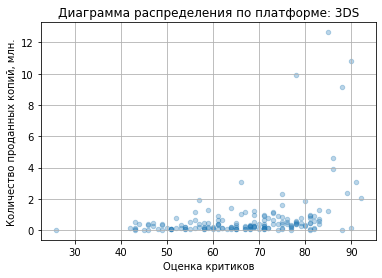

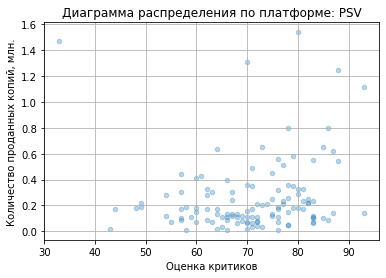

In [37]:
for platform in ['XOne','WiiU','3DS','PSV']:
    data_platform_cs = data_with_critic_score.query('platform == @platform')
    data_platform_cs.plot(x ='critic_score', y = 'total_sales', kind = 'scatter', grid = 'True', alpha = 0.3)
    plt.title('Диаграмма распределения по платформе: {}'.format (platform))
    plt.xlabel('Оценка критиков')
    plt.ylabel('Количество проданных копий, млн.')
      

In [38]:
for platform in ['XOne','WiiU','3DS','PSV']:
    data_platform_сs = data_with_critic_score.query('platform == @platform')
    print('Коэффициент корреляции между оценками критиков и продажами, платформа: {}'.format (platform))
    i = round(data_platform_сs['critic_score'].corr(data_platform_сs['total_sales']),2)
    print(i)

Коэффициент корреляции между оценками критиков и продажами, платформа: XOne
0.42
Коэффициент корреляции между оценками критиков и продажами, платформа: WiiU
0.35
Коэффициент корреляции между оценками критиков и продажами, платформа: 3DS
0.35
Коэффициент корреляции между оценками критиков и продажами, платформа: PSV
0.13


##### Оценки критиков и количество проданных игр показывают наличие прямой связи. Для платформы PSV имеется "выброс", влияющий на результат расчета коэффициента корреляции: игра с оценкой критиков менее 35, но при этом с количеством продаж гораздо выше среднего.

In [39]:
data[(data['platform'] == "PSV")&(data['critic_score'] < 40)&(data['total_sales'] > 1.4)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
868,Minecraft,PSV,2014.0,Misc,0.18,0.64,0.90,0.24,-1,-1.0,RP,1.96
1294,Call of Duty Black Ops: Declassified,PSV,2012.0,Action,0.71,0.43,0.07,0.26,33,4.8,M,1.47


"Выброс" - это "Call of Duty Black Ops: Declassified" - ситуация, когда пользователи ожидают успеха от игры, являющейся продолжением успешной серии игр, но разочаровываются и ставят игре низкую оценку

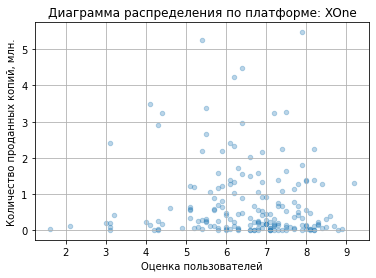

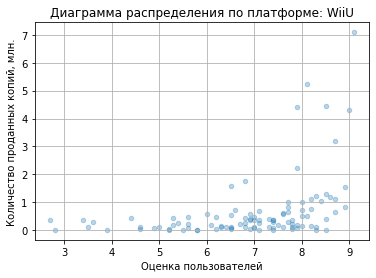

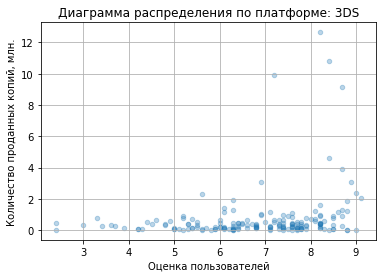

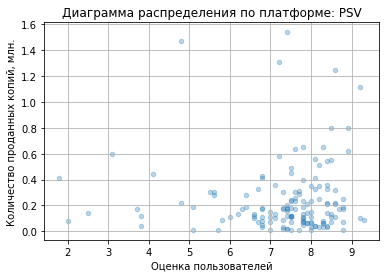

In [40]:
for platform in ['XOne','WiiU','3DS','PSV']:
    data_platform_us = data_with_user_score.query('platform == @platform')
    data_platform_us.plot(x ='user_score', y = 'total_sales', kind = 'scatter', grid = 'True', alpha = 0.3)
    plt.title('Диаграмма распределения по платформе: {}'.format (platform))
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Количество проданных копий, млн.')
      

In [41]:
for platform in ['XOne','WiiU','3DS','PSV']:
    data_platform_us = data_with_user_score.query('platform == @platform')
    print('Коэффициент корреляции между оценками пользователей и продажами, платформа: {}'.format (platform))
    i = data_platform_us['user_score'].corr(data_platform_us ['total_sales'])
    print(i)

Коэффициент корреляции между оценками пользователей и продажами, платформа: XOne
-0.06892505328279414
Коэффициент корреляции между оценками пользователей и продажами, платформа: WiiU
0.4002190202148617
Коэффициент корреляции между оценками пользователей и продажами, платформа: 3DS
0.22480798039571082
Коэффициент корреляции между оценками пользователей и продажами, платформа: PSV
0.013579522883028902


##### Пользователи игр на пратформах Nintendo: WiiU и 3DS возможно опираются на оценки друг друга при покупке игр (имеется корреляция). Возможно у Nintendo лучше реализована возможность оценок и обратной связи. На других платформах коэффициент корреляции близок к нулю.

##### Посмотрим на общее распределение по жанрам за актуальный период

Составим рейтинг жанров за актуальный период

In [42]:
data_actually['genre'].value_counts()

Action          1269
Role-Playing     465
Adventure        410
Sports           389
Misc             375
Shooter          329
Racing           180
Fighting         159
Simulation       136
Platform         122
Strategy         117
Puzzle            71
Name: genre, dtype: int64

Оценим изменение популярности жанров во времени

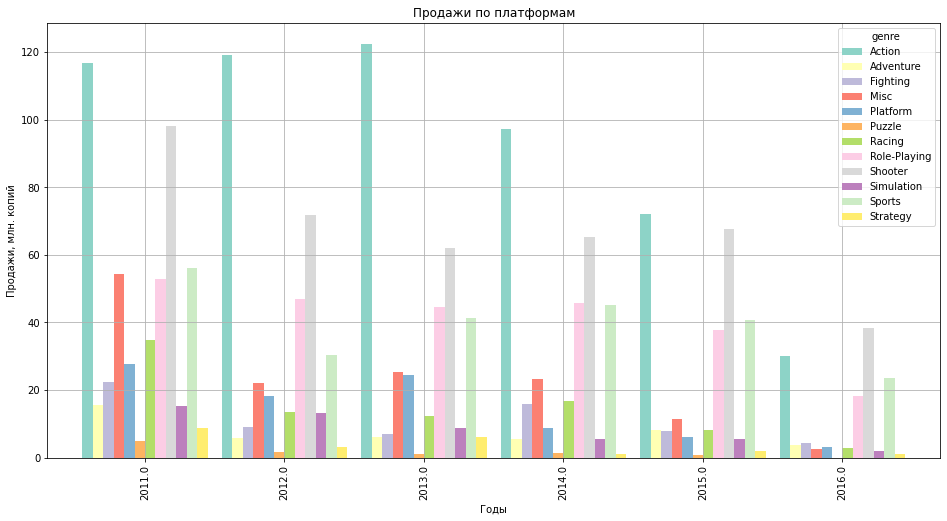

In [43]:
data_actually.pivot_table(index = 'year_of_release', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', grid = True, figsize = (16,8), width=0.9, colormap='Set3')
plt.title('Продажи по платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Годы')
plt.show;

На диаграмме видно самые популярные жанры. При этом, популярность жанра Action упала к 2016 году (возможно из-за неполных данных за год), падение жанра Shooter - не такое значитеьное. Популятрность RPG-игр (Role-Playing) и игр жанра Sport не демонстрирует такого падения. В целом, наиболее популярные игры - из первой четверки наиболее популярных за актуальный период. К жанру Misc (пятый жанр в топе) - вероятнее всего относятся разные игры (игры, которы сложно отнести к определенному жанру), но к текущему периоду популярность его минимальна (популярная "Minekraft", кстати, относится к жанру Misc).

Оценим популярность различных жанров в зависимости от платформ

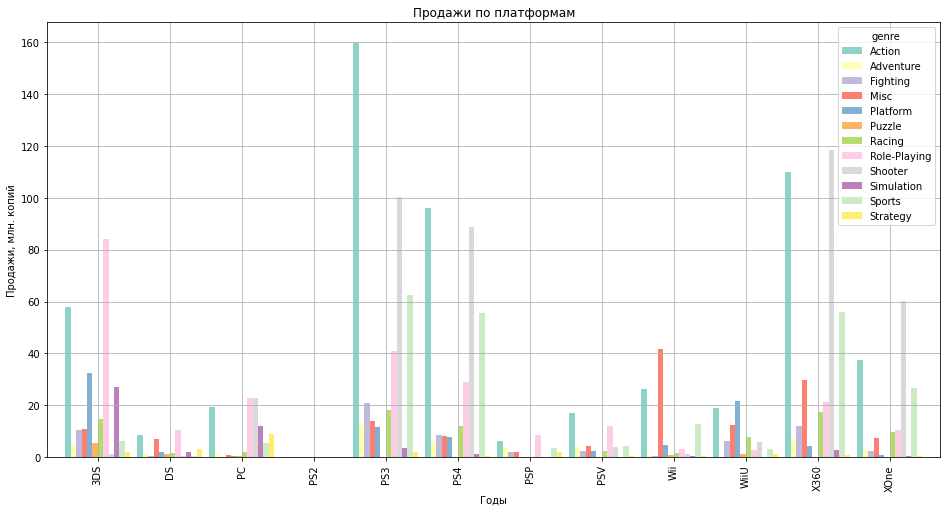

In [44]:
data_actually.pivot_table(index = 'platform', columns = 'genre', values = 'total_sales', aggfunc = 'sum').plot(kind = 'bar', grid = True, figsize = (16,8), width=0.9, colormap='Set3')
plt.title('Продажи по платформам')
plt.ylabel('Продажи, млн. копий')
plt.xlabel('Годы')
plt.show;

Этот график показывает, что некоторые виды игр пользователям "удобнее" играть на определенных игровых платформах (или эту статистику задают определенные игры, созданные для этой платформы). Например,игры жанра RPG, которые оказались самыми популярными для платформы 3DS.

### Вывод 
#### Проведен исследовательский анализ данных. Количество выпускаемых игр с 1990-го года значительно росло до 2009-го года, после чего произошло снижение выпускаемых игр, и на протяжении пяти лет нет значительных колебаний. определены актуальные производители игровых платформ, которые в настоящее время конкурируют за лидерство на рынке. Это : Sony, Nintendo, Microsoft. Ниболее популярна и перспективна в настоящее время игровая консоль PS4. 
#### Определен для различных игровых платформ коэффициент корреляции, который дает основание предположить, что имеется прямая связь между отзывами критиков и количеством продаж. Оценки пользователей игры возможно влияют на продажи пользователей платформ Nintendo. 
#### Наиболее популярные в актуальном периоде жанры: Action, Role-Playing,  Adventure, Sports. Наименее популярны: Simulation, Platform, Strategy,  Puzzle.

### Шаг 4. [ Анализ данных и рейтинги](#content)<a id="step_4"></a>

Составим портрет пользователя каждого региона. 

Определим для пользователя каждого региона (NA, EU, JP) сумму продаж (и долю от общей суммы продаж по региону) по различным игровым платформам. Составим рейтинг (топ-5) для каждого региона.

In [45]:
data_na_p = data_actually.pivot_table(values='na_sales', index='platform', aggfunc='sum')
na_sum = data_actually['na_sales'].sum()
data_na_p = data_na_p.sort_values(by = 'na_sales', ascending = False).head(5)
data_na_p['part'] = data_na_p['na_sales'] / na_sum 

data_eu_p = data_actually.pivot_table(values='eu_sales', index='platform', aggfunc='sum')
eu_sum = data_actually['eu_sales'].sum()
data_eu_p = data_eu_p.sort_values(by = 'eu_sales', ascending = False).head(5)
data_eu_p['part'] = data_eu_p['eu_sales'] / eu_sum

data_jp_p = data_actually.pivot_table(values='jp_sales', index='platform', aggfunc='sum')
jp_sum = data_actually['jp_sales'].sum()
data_jp_p = data_jp_p.sort_values(by = 'jp_sales', ascending = False).head(5)
data_jp_p['part'] = data_jp_p['jp_sales'] / jp_sum

print('Рейтинг продаж на платформах в Японии:')
display(data_jp_p)
print('Рейтинг продаж на платформах в Европе')
display(data_eu_p)
print('Рейтинг продаж на платформах в Северной Америке')
display(data_na_p)

Рейтинг продаж на платформах в Японии:


,jp_sales,part
platform,,
3DS,100.62,0.409607
PS3,49.39,0.201058
PSP,24.04,0.097863
PSV,21.84,0.088907
PS4,15.96,0.064970


Рейтинг продаж на платформах в Европе


,eu_sales,part
platform,,
PS3,163.10,0.243509
PS4,141.09,0.210648
X360,117.10,0.174831
3DS,61.27,0.091476
PC,56.70,0.084653


Рейтинг продаж на платформах в Северной Америке


,na_sales,part
platform,,
X360,226.80,0.273332
PS3,168.26,0.202782
PS4,108.74,0.131050
XOne,93.12,0.112225
3DS,82.65,0.099607


Японцы предпочитают портативные консоли (почти половина - 3DS, в рейтинге также PSP и PSV ). Они не занимают много места... У консервативных европейцев в рейтинге оказались игры на PC - почти столько же, сколько и на портативной 3DS. Среди игроков из Америки популярны игры на XBox, которых в японском рейтинге не оказалось.  

Определим для пользователя каждого региона (NA, EU, JP) сумму продаж (и долю от общей суммы продаж по региону) по различным игровым жанрам. Составим рейтинг (топ-5) для каждого региона.

In [46]:
data_na_g = data_actually.pivot_table(values='na_sales', index='genre', aggfunc='sum')
data_na_g = data_na_g.sort_values(by = 'na_sales', ascending = False).head(5)
data_na_g['part'] = data_na_g['na_sales'] / na_sum 

data_eu_g = data_actually.pivot_table(values='eu_sales', index='genre', aggfunc='sum')
data_eu_g = data_eu_g.sort_values(by = 'eu_sales', ascending = False).head(5)
data_eu_g['part'] = data_eu_g['eu_sales'] / eu_sum

data_jp_g = data_actually.pivot_table(values='jp_sales', index='genre', aggfunc='sum')
data_jp_g = data_jp_g.sort_values(by = 'jp_sales', ascending = False).head(5)
data_jp_g['part'] = data_jp_g['jp_sales'] / jp_sum

print('Рейтинг продаж по жанрам в Японии:')
display(data_jp_g)
print('Рейтинг продаж по жанрам в Европе')
display(data_eu_g)
print('Рейтинг продаж на по жанрам в Северной Америке')
display(data_na_g)

Рейтинг продаж по жанрам в Японии:


,jp_sales,part
genre,,
Role-Playing,79.87,0.325137
Action,63.62,0.258986
Misc,17.60,0.071647
Fighting,12.38,0.050397
Platform,12.13,0.049379


Рейтинг продаж по жанрам в Европе


,eu_sales,part
genre,,
Action,199.12,0.297287
Shooter,148.02,0.220995
Sports,88.48,0.132101
Role-Playing,62.30,0.093014
Racing,40.58,0.060586


Рейтинг продаж на по жанрам в Северной Америке


,na_sales,part
genre,,
Action,230.92,0.278297
Shooter,194.43,0.234321
Sports,108.70,0.131002
Role-Playing,83.78,0.100969
Misc,69.69,0.083988


Любимые жанры в Европе и Северной Америке практически идентичны, за исключением пятого места: Европейцам нравятся еще и гоночные симуляторы. Японцы демонстрируют культурные различия: продажи игр жанра RPG значительно превосходят продажи в Европе и Америке (где они находятся на 4-м месте). Но и жанр Action здесь популярен - второе место. Вместо спортивных игр японцы предпочитают симуляторы боев.

Оценим, как влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [47]:
data_na_r = data_actually.pivot_table(values='na_sales', index='rating', aggfunc='sum')
data_na_r = data_na_r.sort_values(by = 'na_sales', ascending = False)
data_na_r['part'] = data_na_r['na_sales'] / na_sum 

data_eu_r = data_actually.pivot_table(values='eu_sales', index='rating', aggfunc='sum')
data_eu_r = data_eu_r.sort_values(by = 'eu_sales', ascending = False)
data_eu_r['part'] = data_eu_r['eu_sales'] / eu_sum

data_jp_r = data_actually.pivot_table(values='jp_sales', index='rating', aggfunc='sum')
data_jp_r = data_jp_r.sort_values(by = 'jp_sales', ascending = False)
data_jp_r['part'] = data_jp_r['jp_sales'] / jp_sum

print('Рейтинг продаж по жанрам в Японии:')
display(data_jp_r)
print('Рейтинг продаж по жанрам в Европе')
display(data_eu_r)
print('Рейтинг продаж на по жанрам в Северной Америке')
display(data_na_r)

Рейтинг продаж по жанрам в Японии:


,jp_sales,part
rating,,
RP,138.21,0.562630
E,36.68,0.149318
T,33.39,0.135925
M,26.14,0.106412
E10+,11.23,0.045715
EC,0.00,0.000000


Рейтинг продаж по жанрам в Европе


,eu_sales,part
rating,,
M,250.26,0.373639
E,141.73,0.211604
RP,116.64,0.174144
T,83.16,0.124158
E10+,78.00,0.116454
EC,0.00,0.000000


Рейтинг продаж на по жанрам в Северной Америке


,na_sales,part
rating,,
M,308.45,0.371734
E,170.17,0.205083
RP,123.69,0.149067
E10+,117.72,0.141872
T,109.31,0.131737
EC,0.42,0.000506


Ранее было произведено заполнение пропущенных значений рейтинга на значение 'RP' - «Рейтинг ожидается» (в наших данных это равносильно отсутствующему рейтингу). Таким образом, для Японии большее количество относится к категории 'RP'. 

В целом, результаты Европы и Америки схожи: 37% игр "Для взрослых" («M» («Mature») — «Для взрослых»), 20% - для всех возрастных категорий, остальные - для подростков и детей от 10 лет.
В Японии игр из категории "для взрослых" только 11%. Наиболее продаваемые игры "Для всех" (повторюсь, не считая игр без указания категории).

### Вывод 
#### Определены различия между игровыми предпочтениями пользователей из разных регионов: игроки из Северной америки и Европы в целом, имеют схожи игровые пристрастия. Японские пользователи отличаются: предпочитают другие игры и на других платформах. Эти данные определены за период с 2011 года. Напомню, что рейтинг некоторых игровых платформ падает в пользу новых (новый XOne постепенно сменяет X360, PS4 меняет PS3), но общая тенденция прослеживается.

### Шаг 5. [Проверка гипотез](#content)<a id="step_5"></a>

Мы определили, что одна из перспективных игровых платформ - это Xbox One, появилась на рынке в 2013 году. Игры на PC выпускаются и продаются на протяжении 30 лет. 
Проверим гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сформулируем нулевую и альтернативную гипотезы:
* *H0: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC*
* *H1: Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC*


In [48]:
d_xo_mean = data.query('platform == "XOne" and user_score > 0 and year_of_release > 2012')['user_score'].mean()
d_pc_mean = data.query('platform == "PC" and user_score > 0 and year_of_release > 2012')['user_score'].mean()

print('Средний пользовательский рейтинг платформы Xbox One:', d_xo_mean)
print('Средний пользовательский рейтинг платформы Xbox PC:', d_pc_mean)

Средний пользовательский рейтинг платформы Xbox One: 6.52142857142857
Средний пользовательский рейтинг платформы Xbox PC: 6.269677419354836


Построим гистограмму распределения двух выборок

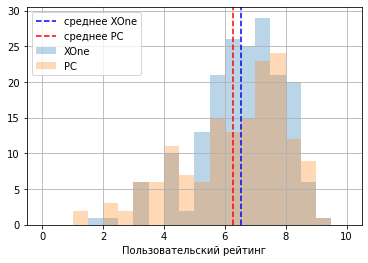

In [49]:
ax = plt.hist(x=data.query('platform == "XOne" and user_score > 0 and year_of_release > 2012')['user_score'],bins=20, range = (0,10), label  = 'XOne', alpha = 0.3)
plt.hist(x=data.query('platform == "PC" and user_score > 0 and year_of_release > 2012')['user_score'],  bins=20, range = (0,10), label = 'PC', alpha = 0.3)
 
plt.xlabel('Пользовательский рейтинг')
plt.axvline(d_xo_mean,label = 'среднее XOne', color='b', linestyle='--') 
plt.axvline(d_pc_mean,label = 'среднее PC', color='r', linestyle='--') 
plt.grid()
plt.legend();

На гистограмме значения распределены нормально. Проверку гипотез выполним на выборках за одинаковый период методом scipy.stats.ttest_ind (array1, array2, equal_var)для двух неравных выборок

Средние значения сопоставимы, зададим alpha = 0.05

In [50]:
alpha = 0.05

results_t = st.ttest_ind(data.query('platform == "XOne" and user_score > 0 and year_of_release > 2012')['user_score'],data.query('platform == "PC" and user_score > 0 and year_of_release > 2012')['user_score'])
print('p-значение:', results_t.pvalue)

if results_t.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


##### Мы не можем отвергнуть нулевую гипотезу о равенстве пользовательских оценок игровых платформ на заданном уровне статистической значимости. Приняв альтернативную, в 16% случаев будет допущена ошибка.

Проверим гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

Сформулируем нулевую и альтернативную гипотезы:
* *H0: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports* 
* *H1: Средний пользовательский рейтинг жанра Action отличается от среднего пользовательского рейтинга жанра Sports* 

Проверку гипотез выполним на выборках за актуальный период

In [51]:
d_a_mean = data_actually.query('genre == "Action" and user_score > 0')['user_score'].mean()
d_s_mean = data_actually.query('genre == "Sports" and user_score > 0')['user_score'].mean()

print('Средний пользовательский рейтинг жанра Action:', d_a_mean)
print('Средний пользовательский рейтинг жанра Sports:', d_s_mean)
     

Средний пользовательский рейтинг жанра Action: 6.775903614457846
Средний пользовательский рейтинг жанра Sports: 5.650813008130081


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Построим гистограмму распределения двух выборок

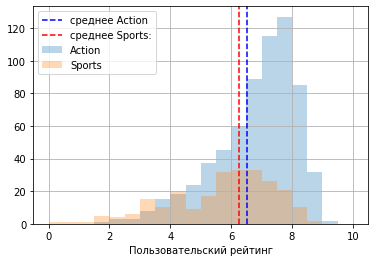

In [52]:
ax = plt.hist(x=data_actually.query('genre == "Action" and user_score > 0')['user_score'],bins=20, range = (0,10), label  = 'Action', alpha = 0.3)
plt.hist(x=data_actually.query('genre == "Sports" and user_score > 0')['user_score'],  bins=20, range = (0,10), label = 'Sports', alpha = 0.3)
 
plt.xlabel('Пользовательский рейтинг')
plt.axvline(d_xo_mean,label = 'среднее Action', color='b', linestyle='--') 
plt.axvline(d_pc_mean,label = 'среднее Sports:', color='r', linestyle='--') 
plt.grid()
plt.legend();

Гистограмма распределения оценок по жанру Sports имеет "широкие хвосты", а гистограмма жанра Action имеет смещение влево, при этом средние значения расположены близко друг к другу. Проверку гипотез выполним аналогично методом scipy.stats.ttest_ind (array1, array2, equal_var)для двух неравных выборок.

In [53]:
alpha = 0.05

results_t = st.ttest_ind(data_actually.query('genre == "Action" and user_score > 0')['user_score'],data_actually.query('genre == "Sports" and user_score > 0')['user_score'])
print('p-значение:', results_t.pvalue)

if results_t.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


##### Мы отвергаем нулевую гипотезу о равенстве пользовательских оценок жанров Action и Sports. Средние значения оценок нельзя считать равными.

### Вывод 
#### На основании выборок из имеющихся данных сформулированы и проверены гипотезы о равенстве оценок пользователей разных платформ и разных жанров. Нулевые гипотезы сформулированы на предположении, что средние значения оценок равны. Альтернативные гипотезы - на противоположном предположении. На основании величины p-value получен вывод об отвержении (не отвержении) нулевой гипотезвы.

### Шаг 6. [Общий вывод](#content)<a id="step_6"></a>

#### На основании данных о продажах игр в различных странах с 1985 года по 2016 год получены следующие результаты:

#### 1. Пик продаж игр пришелся на период 2007-2009 год, после которого с 2012 года количество проданных игр едва достигает 600 млн. копий игр в год. 
#### 2. Наиболее перспективные игровые платформы: PS4, XOne - новые игровые консоли, которые сменили популярных предшественников. Срок, характерный для присутствия на рынке аналогичных приставок, составлят около 6 лет.
#### 3. Определено наличие зависимости между отзывами критиков и продажами, за исключением некоторых "игр-разочарований", ожидаемых игроками (которые вероятно были приобретены еще до ознакомления с рецензией). Связи между оценками игроков и продажами выявлено не было.
#### 4. Игровые пристрастия жителей Европы и Северной Амрики похожи, но отличаются от жителей Японии. В рейтинге Японии нет игр жанра Shooter, а вместо спортивных игр там предбочитают бои.
#### 5. В отличие от Европейцев и Американцев, игроки из Японии играют в игры на портативных консолях.
#### 6. Проверены гипотезы о равенстве пользовательских оценок: гипотезу о равенстве оценок игр на PC и XOne не удалось отвергнуть (и возможно, что они действительно сопоставимы), а средние оценки жанра Aсtion и Sports с высокой долей вероятности отличаются: Aсtion нравится пользователям больше.